

# Project: Exploring Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset chosen for this investigation is The Soccer Dataset.
it's contains data about European leagues, Teams, Players and Matches played from 2008/2009	season to 2015/2016 season
the dataset consists of 7 main files (and sequence file to indicate them)
there are many questions, results, statistics we cn get from this dataset 
but we'll only answer 3 main questions 

> 1- Who won the league in each season ?
>
>(indication for strong clubs in every season)

> 2- How many league titles every club won in the given period ?
>
>(indication for strong clubs in the history)

> 3- Are long players better in headers(according to FIFA stats) ?
>
>(indication for the relation between height and heading)


In [41]:
#  import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness.

### General Properties

In [42]:
# Loading  data 
Matches = pd.read_csv('Match.csv')
Teams = pd.read_csv('Team.csv')
Team_Attributes = pd.read_csv('Team_Attributes.csv')
League = pd.read_csv('League.csv')
Player = pd.read_csv('Player.csv')
Player_Attributes = pd.read_csv('Player_Attributes.csv')

In [43]:
print(Matches.head(5)) #to view some rows 
print(Matches.shape) #to view size
#to view the cloumns and number of null values
print(Matches.isnull().sum().head(55))
print(Matches.isnull().sum().tail(60)) 
#the dataframe contains essential data like the league, season, teams, result 
#most of the leagues have 20 teams which means 38 match per season

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3

In [44]:
print(Teams.head(5)) #to view some rows
print(Teams.shape) #to view size
#to view the cloumns and number of null values
print(Teams.isnull().sum())

   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB
(299, 5)
id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


##### the 'team_fifa_api_id' column have some missing values, we'll try to avoid it for now and use the 'team_api_id' which is clear and used in other df's



In [45]:
print(Team_Attributes.head(5)) #to view some rows
print(Team_Attributes.shape) #to view size
#to view the cloumns and number of null values
print(Team_Attributes.isnull().sum())

   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass  ... chanceCreationShooting 

##### it contains data about the team's style of playing, we'll not use this one 

In [46]:
print(League.head(5)) #to view some rows
print(League.shape) #to view size
#to view the cloumns and number of null values
print(League.isnull().sum())

      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
(11, 3)
id            0
country_id    0
name          0
dtype: int64


##### this is a small one, it only contains league numbers. it'll help us in viewing the results to make it meaningful.
##### country df have the same data by the way

In [47]:
print(Player.head(5)) #to view some rows
print(Player.shape) #to view size
#to view the cloumns and number of null values
print(Player.isnull().sum())

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  
(11060, 7)
id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64


##### this one contains personal data about the players
##### no missing data :)

In [48]:
print(Player_Attributes.head(5)) #to view some rows
print(Player_Attributes.shape) #to view size
#to view the cloumns and number of null values
print(Player_Attributes.isnull().sum())

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

##### this one contains fifa ratings data about the players
##### more rows than players df
##### a lot of missing data :(


### Data Cleaning 

In [49]:
#to answer the 1st and 2nd questions we w'll only use the first 11 columns of Match dataframe
Matches_results = Matches.iloc[:, 0:11]
Matches_results.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [50]:
#to answer the 3rd we'll only use columns of Player_Attributes dataframe
#but it is really huge , let's check duplicates 
sum(Player_Attributes['player_api_id'].duplicated()) 

172918

##### oh boy,  alot of dublicates :( ,let's remove them 

In [51]:
# Removing dublicates
Player_Attributes.drop_duplicates(subset=['player_api_id'],inplace=True)
Attributes_Edited = Player_Attributes
Attributes_Edited

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0
183953,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,NaN,_0,64.0,...,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
183960,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,NaN,_0,48.0,...,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 :
### Who won the league in each season in each country?

> Simply, Each team play against other teams 2 matches (one home, one away)
>
>in a single match each team gets: 3 points for a win , 1 for a tie , 0 for a loss
>
>the league winner is the team who gets the higher number of points.

In [52]:
#here we'll make 2 new columns 
#'home_team_points' to indicate the number of points the home team get of the match
#'away_team_points' to indicate the number of points the away team get of the match

Matches_results['home_team_points']=np.where(Matches_results['home_team_goal']==Matches_results['away_team_goal'],1,np.nan)
Matches_results['away_team_points']=np.where(Matches_results['home_team_goal']==Matches_results['away_team_goal'],1,np.nan)
Matches_results['home_team_points']=np.where(Matches_results['home_team_goal']>Matches_results['away_team_goal'],3,Matches_results['home_team_points'])
Matches_results['away_team_points']=np.where(Matches_results['home_team_goal']>Matches_results['away_team_goal'],0,Matches_results['away_team_points'])
Matches_results['home_team_points']=np.where(Matches_results['home_team_goal']<Matches_results['away_team_goal'],0,Matches_results['home_team_points'])
Matches_results['away_team_points']=np.where(Matches_results['home_team_goal']<Matches_results['away_team_goal'],3,Matches_results['away_team_points'])

Matches_results.head()



,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_points,away_team_points
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1.0,1.0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1.0,1.0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0.0,3.0
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3.0,0.0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0.0,3.0


In [53]:
#making a dataframe summing gained points on home for each team per season per league
Home_Teams_Points = pd.DataFrame(Matches_results.groupby(['league_id', 'season', 'home_team_api_id'])['home_team_points'].sum())
Home_Teams_Points.index.names=['league_id', 'season', 'team_api_id']

#making a pd.series summing gained points on away for each team per season per league
Away_Teams_Points = Matches_results.groupby(['league_id', 'season', 'away_team_api_id'])['away_team_points'].sum()
Away_Teams_Points.index.names=['league_id', 'season', 'team_api_id']

#adding the away series to the home df and summing the total points for each team
Teams_Points=pd.concat([Home_Teams_Points,Away_Teams_Points],axis=1)
Teams_Points['Total_Points'] = Teams_Points['home_team_points'] + Teams_Points['away_team_points']

#removing away and home points (we'll not use them anymore)
Teams_Points.pop('away_team_points')
Teams_Points.pop('home_team_points')
Teams_Points.head(18)

Total_Points
league_id season    team_api_id              
1         2008/2009 4049                 27.0
                    7947                 35.0
                    8203                 46.0
                    8342                 59.0
                    8571                 38.0
                    8635                 77.0
                    9984                 47.0
                    9985                 77.0
                    9986                 43.0
                    9987                 50.0
                    9991                 59.0
                    9993                 42.0
                    9994                 51.0
                    9996                 44.0
                    9998                 19.0
                    9999                 30.0
                    10000                55.0
                    10001                52.0

In [54]:
#setting the league number as an index in League dataframe to access the names easier
League = League.set_index('id')

#setting the team number as an index in Teams dataframe to access the names easier
Teams = Teams.set_index('team_api_id')

In [55]:

#this is an empty df to collect all the title winners (this will help su in the next question)
All_Champs=pd.DataFrame({' ':[]})
print('###### European League Winners #####')
#this for loops are to find the highest number of points per season per league
#so we'll go deep step by step
for league,sub_df in Teams_Points.groupby(level=0): #here we'll work on all the seasons per league
    print('----------------------------')
    print('### Winners of {} ###'.format(League.loc[league,'name'])) # printing the league name from League dataframe
    
    for season,sub_df_2 in sub_df.groupby(level=1): #here we'll work on each season alone
        print('Season: ',season)
        
        #putting the winner(s) in a separate df 
        winner_df=sub_df_2.loc[sub_df_2['Total_Points'] == sub_df_2['Total_Points'].max()].reset_index()
        
        #some cases when 2 teams are equal in points,
        #we'll solve this issue manually because every league has its own rules in such cases
        if winner_df.shape[0] == 2 : 
            if league == 1:
                print('this season both RSC Anderlecht & Standard de Liège was equal in points\nso a playoff matches were held and Standard won 2-1')
                winner_df = winner_df.drop(index=0).reset_index()
            if league == 1729:
                print('this season both Manchester United & Manchester City was equal in points\nMan City won with higher goal difference')
                winner_df = winner_df.drop(index=1).reset_index()
        
        #getting the winner name from Teams dataframe  & printing
        team_name= Teams.loc[winner_df['team_api_id'][0],'team_long_name']
        points_number=winner_df['Total_Points'][0]
        print(team_name+' with {} points '.format(points_number))
        print()
        
        #replacing team & league numbers with names, appending to the title winners df
        winner_df.loc[0,'team_api_id']= team_name
        winner_df.loc[:,'league_id']= League.loc[league,'name']
        All_Champs=All_Champs.append(winner_df)


###### European League Winners #####
----------------------------
### Winners of Belgium Jupiler League ###
Season:  2008/2009
this season both RSC Anderlecht & Standard de Liège was equal in points
so a playoff matches were held and Standard won 2-1
Standard de Liège with 77.0 points 

Season:  2009/2010
RSC Anderlecht with 69.0 points 

Season:  2010/2011
RSC Anderlecht with 65.0 points 

Season:  2011/2012
RSC Anderlecht with 67.0 points 

Season:  2012/2013
RSC Anderlecht with 67.0 points 

Season:  2013/2014
KV Oostende with 14.0 points 

Season:  2014/2015
Club Brugge KV with 61.0 points 

Season:  2015/2016
Club Brugge KV with 64.0 points 

----------------------------
### Winners of England Premier League ###
Season:  2008/2009
Manchester United with 90.0 points 

Season:  2009/2010
Chelsea with 86.0 points 

Season:  2010/2011
Manchester United with 80.0 points 

Season:  2011/2012
this season both Manchester United & Manchester City was equal in points
Man City won with highe

### Research Question 2  
### How many league titles every club won in the given period ?
> here we'll do some small extra steps on the previous results to show the best teams in the given period

In [56]:
#showing the given df before editing
All_Champs.head()

,,index,league_id,season,team_api_id,Total_Points
0,NaN,1.0,Belgium Jupiler League,2008/2009,Standard de Liège,77.0
0,NaN,NaN,Belgium Jupiler League,2009/2010,RSC Anderlecht,69.0
0,NaN,NaN,Belgium Jupiler League,2010/2011,RSC Anderlecht,65.0
0,NaN,NaN,Belgium Jupiler League,2011/2012,RSC Anderlecht,67.0
0,NaN,NaN,Belgium Jupiler League,2012/2013,RSC Anderlecht,67.0


In [57]:
#here we count each team number of league trouphies 
League_Champs=pd.DataFrame(All_Champs.groupby(['league_id','team_api_id'])['team_api_id'].count()).rename(columns = {'team_api_id': 'N_Trophies'}).reset_index(level=1)
print(League_Champs)

                                     team_api_id  N_Trophies
league_id                                                   
Belgium Jupiler League            Club Brugge KV           2
Belgium Jupiler League               KV Oostende           1
Belgium Jupiler League            RSC Anderlecht           4
Belgium Jupiler League         Standard de Liège           1
England Premier League                   Chelsea           2
England Premier League            Leicester City           1
England Premier League           Manchester City           2
England Premier League         Manchester United           3
France Ligue 1             Girondins de Bordeaux           1
France Ligue 1                        LOSC Lille           1
France Ligue 1            Montpellier Hérault SC           1
France Ligue 1            Olympique de Marseille           1
France Ligue 1               Paris Saint-Germain           4
Germany 1. Bundesliga          Borussia Dortmund           2
Germany 1. Bundesliga   

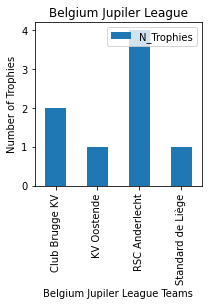

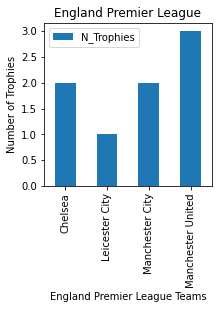

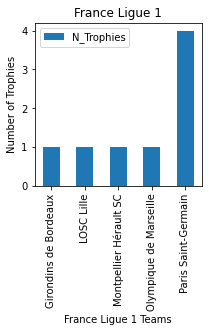

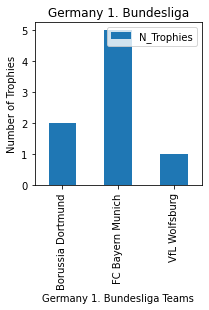

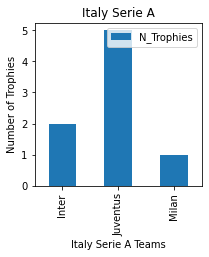

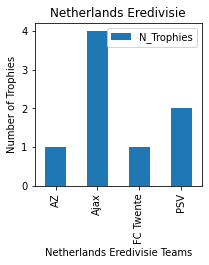

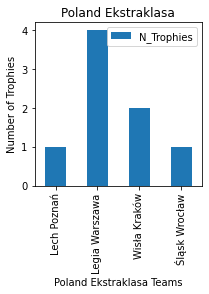

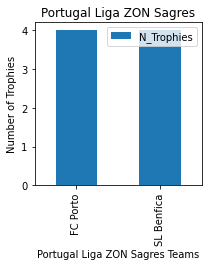

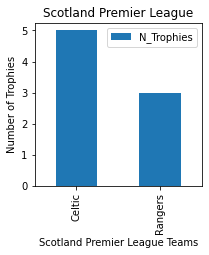

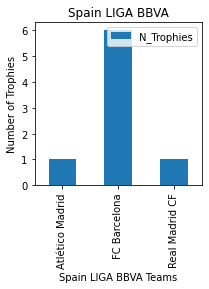

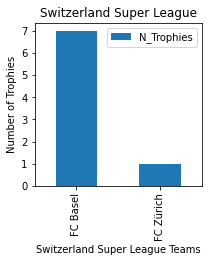

In [58]:
#here we'll make a df for each league to print its own statistics
for league in League.name.unique() :
    Plot_League_Champs = League_Champs.loc[league]
    Plot_League_Champs.plot(x='team_api_id' , y='N_Trophies',kind='bar', figsize=(3,3))
    plt.title(league)
    plt.xlabel(league+' Teams')
    plt.ylabel('Number of Trophies')

### Research Question 3  
### Are tall players better in headers(according to FIFA stats) ? and what is the relation between this and goalkeepers ?


In [59]:
# in data cleaning section, we made an edited version of Player_Attributes
Attributes_Edited


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,183925,2488,26357,2015-03-06 00:00:00,73.0,73.0,right,low,medium,42.0,...,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0
183953,183954,111191,36491,2011-02-22 00:00:00,68.0,73.0,left,NaN,_0,64.0,...,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0
183960,183961,47058,35506,2011-02-22 00:00:00,67.0,78.0,right,NaN,_0,48.0,...,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0


In [60]:
# here we'll set both players & Attributes dfs to the same index to make it easier to move data from one to another
Attributes_Edited = Attributes_Edited.sort_values(by='player_api_id').set_index('player_api_id')
Attributes_Edited.head()

,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,139844,148544,2015-01-16 00:00:00,61.0,61.0,right,medium,medium,50.0,47.0,...,55.0,66.0,62.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0
2752,44145,135819,2015-10-16 00:00:00,72.0,72.0,right,medium,medium,39.0,40.0,...,55.0,38.0,72.0,74.0,67.0,12.0,7.0,8.0,10.0,16.0
2768,88285,110019,2016-03-17 00:00:00,74.0,74.0,left,medium,medium,44.0,45.0,...,60.0,16.0,76.0,76.0,77.0,12.0,15.0,13.0,14.0,10.0
2770,72142,182861,2013-07-05 00:00:00,69.0,69.0,right,medium,low,58.0,66.0,...,68.0,69.0,33.0,43.0,25.0,12.0,13.0,6.0,14.0,15.0
2790,5122,110809,2010-08-30 00:00:00,67.0,77.0,left,None,7,72.0,37.0,...,60.0,54.0,70.0,73.0,69.0,8.0,14.0,8.0,13.0,12.0


In [61]:
Player_Edited = Player.sort_values(by='player_api_id').set_index('player_api_id')
Player_Edited.head()

,id,player_name,player_fifa_api_id,birthday,height,weight
player_api_id,,,,,,
2625,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154
2752,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174
2768,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154
2770,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161
2790,306,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163


In [62]:
#here we'll add heading & goalkeeping data from Attributes to Player_Edited
Player_Edited = pd.concat([Player_Edited,Attributes_Edited['gk_reflexes'],Attributes_Edited['heading_accuracy']],axis=1)
Player_Edited

,id,player_name,player_fifa_api_id,birthday,height,weight,gk_reflexes,heading_accuracy
player_api_id,,,,,,,,
2625,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,8.0,46.0
2752,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174,16.0,82.0
2768,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154,10.0,72.0
2770,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161,15.0,64.0
2790,306,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163,12.0,51.0
...,...,...,...,...,...,...,...,...
744907,3982,Greg Taylor,226508,1997-11-05 00:00:00,172.72,137,9.0,48.0
746419,3488,Francisco Afonso,233930,1997-04-24 00:00:00,175.26,152,9.0,50.0
748432,3607,Fynn Arkenberg,233969,1996-03-04 00:00:00,187.96,176,6.0,57.0


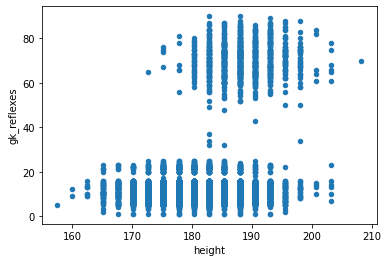

In [63]:
#Now let's draw scatter plots to find relations

#here we plot height with goalkeeping 
Player_Edited.plot(x='height', y='gk_reflexes', kind='scatter');


##### the plot is cutted into 2 regions :

>1- gk > 30 : the gk region (most of the gks are above 175/180 cm)
>
>2- gk < 30 : the field players region (various heights with low gk abilities)

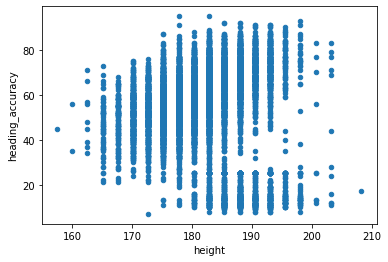

In [64]:
#here we plot height with heading 
Player_Edited.plot(x='height', y='heading_accuracy', kind='scatter');


#### the plot is not clear enough :(

In [65]:
# so let's make a df for players only
players_no_gk = Player_Edited.loc[(Player_Edited['gk_reflexes']<30)]
players_no_gk

,id,player_name,player_fifa_api_id,birthday,height,weight,gk_reflexes,heading_accuracy
player_api_id,,,,,,,,
2625,8372,"Patryk Rachwal,18",148544,1981-01-27 00:00:00,175.26,154,8.0,46.0
2752,2639,Diego Mainz,135819,1982-12-29 00:00:00,187.96,174,16.0,82.0
2768,5319,Jose Dorado,110019,1982-07-10 00:00:00,180.34,154,10.0,72.0
2770,4339,Ignacio Gonzalez,182861,1982-05-14 00:00:00,180.34,161,15.0,64.0
2790,306,Alberto Rey,110809,1974-02-15 00:00:00,175.26,163,12.0,51.0
...,...,...,...,...,...,...,...,...
744907,3982,Greg Taylor,226508,1997-11-05 00:00:00,172.72,137,9.0,48.0
746419,3488,Francisco Afonso,233930,1997-04-24 00:00:00,175.26,152,9.0,50.0
748432,3607,Fynn Arkenberg,233969,1996-03-04 00:00:00,187.96,176,6.0,57.0


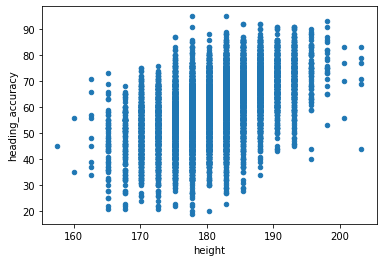

In [66]:
#here we plot height with heading for players only
players_no_gk.plot(x='height', y='heading_accuracy', kind='scatter');


##### its really opvious that there are a kind of direct proportion relation between height and heading

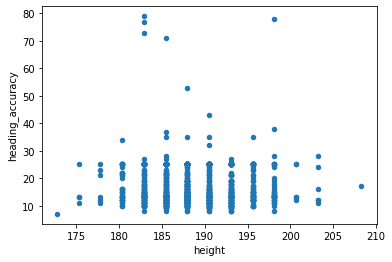

In [67]:
#plotting gks only
gk_no_players = Player_Edited.loc[(Player_Edited['gk_reflexes']>30)]
gk_no_players.plot(x='height', y='heading_accuracy', kind='scatter');

#### its also clear that most of them can't play with head

<a id='conclusions'></a>
## Conclusions

> #### Results :
>
> 1- In most cases only one team has the biggest number of points and crowned as a champion
>
>2- In few cases more than 1 team share the peak , so we refer the league rules in these cases 
>
>3- In most leagues there are 1 team who always wins the league (Bayern in Germany & PSG in France,...). but some other leagues are very compatitive like England (4 teams won the title and 3 teams more than twice) and Portugal (both Porto & Benfica have 4 titles each)
>
>4- Most of Goal keepers are tall
>
>5- Most of Goal keepers can't play with thier heads 
>
>6- tall field players can play thier heads better

> #### Limitations 
> 
> 1- in Matches df : there are some missing data related match players in some old seasons and leagues , which makes statistics less accurate.
>
> 2- in Matches df : columns from goal to possession , about half of the file has no data in these columns, data is provided in html which is not simple to understand and parse , and some non-null columns have only the openning tag without any data
>
> 3- in Player Attributes df : Most players have multiple cards(explains why too many dublicates) 
but some of these cards are without any data totally,
and some other without data in some columns 
>
> 4- in Player Attributes df : Each football player have a position in the field , this column is missing in this df despite being an important part of an analysis and would be really helpful 
>
> 5- in Player df : some players have numbers at the end thier names, which have to be parsed in case we printed it.
>
> 6- in Player df : there are players with the exact same name like : Adama Traore(2), Adriano(4) ,Marcelo(3) ,Rui Miguel(2) which could be confusing during analysis
>
> 7- in Player df : the weight column provides the players weights in pounds (which is not used in europe any more) 
>
> 8- in Team Attributes df : some rows have missing values of buildUpPlayDribbling column which will affect any statistics depends on this column 